<a href="https://colab.research.google.com/github/sathvikeppakayala/predictive_analytics/blob/student_admission_prediction/Student_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

#The dataset has GRE, GPA and university Rank. From these data we have to identify that if a student will
#get an admit (0 or 1) in that university or not. So this is a classification problem.

#Dataset is available at following link
#https://stats.idre.ucla.edu/stat/data/binary.csv

#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline
#Use following two lines of code to print multiple statements

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


#I have downloaded it saved it in local as 'data.csv'


# Define the headers since the data does not have any
#headers = ["Admit","GRE","GPA","Rank"]
# Read in the CSV file
df = pd.read_csv("binary.csv" )

##First step is to visualize our dataset

#Check first 5 rows
print ("Head values:")
df.head()

#Check types of data
print ("Types:")
df.dtypes
print (type(df))

#Check shape of dataset
print ("Dataset Shape values:")
df.shape

#Check some information
df.info()

#Check if there are any null values in data
print ("Any Null values:")
df.isnull().values.any()


Head values:


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


Types:


,0
admit,int64
gre,int64
gpa,float64
rank,int64


<class 'pandas.core.frame.DataFrame'>
Dataset Shape values:


(400, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
Any Null values:


np.False_

In [3]:
##Second step is to check for some statistics

#Sum of each column value
print ("Sum of each column:")
df.sum()
##Here sum of admit and rank column is not meaningful. Even the sum of GRE and GPA column seems meaningless.
##But from these value, We can say that we have to normalize the each feature for further calculation.

#Some more statistics
print ("Mean values: (Sum/Total examples)")
df.mean()

df.describe()

Sum of each column:


,0
admit,127.00
gre,235080.00
gpa,1355.96
rank,994.00


Mean values: (Sum/Total examples)


,0
admit,0.3175
gre,587.7000
gpa,3.3899
rank,2.4850


,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


<Axes: xlabel='gre', ylabel='Count'>

<Axes: xlabel='gpa', ylabel='Count'>

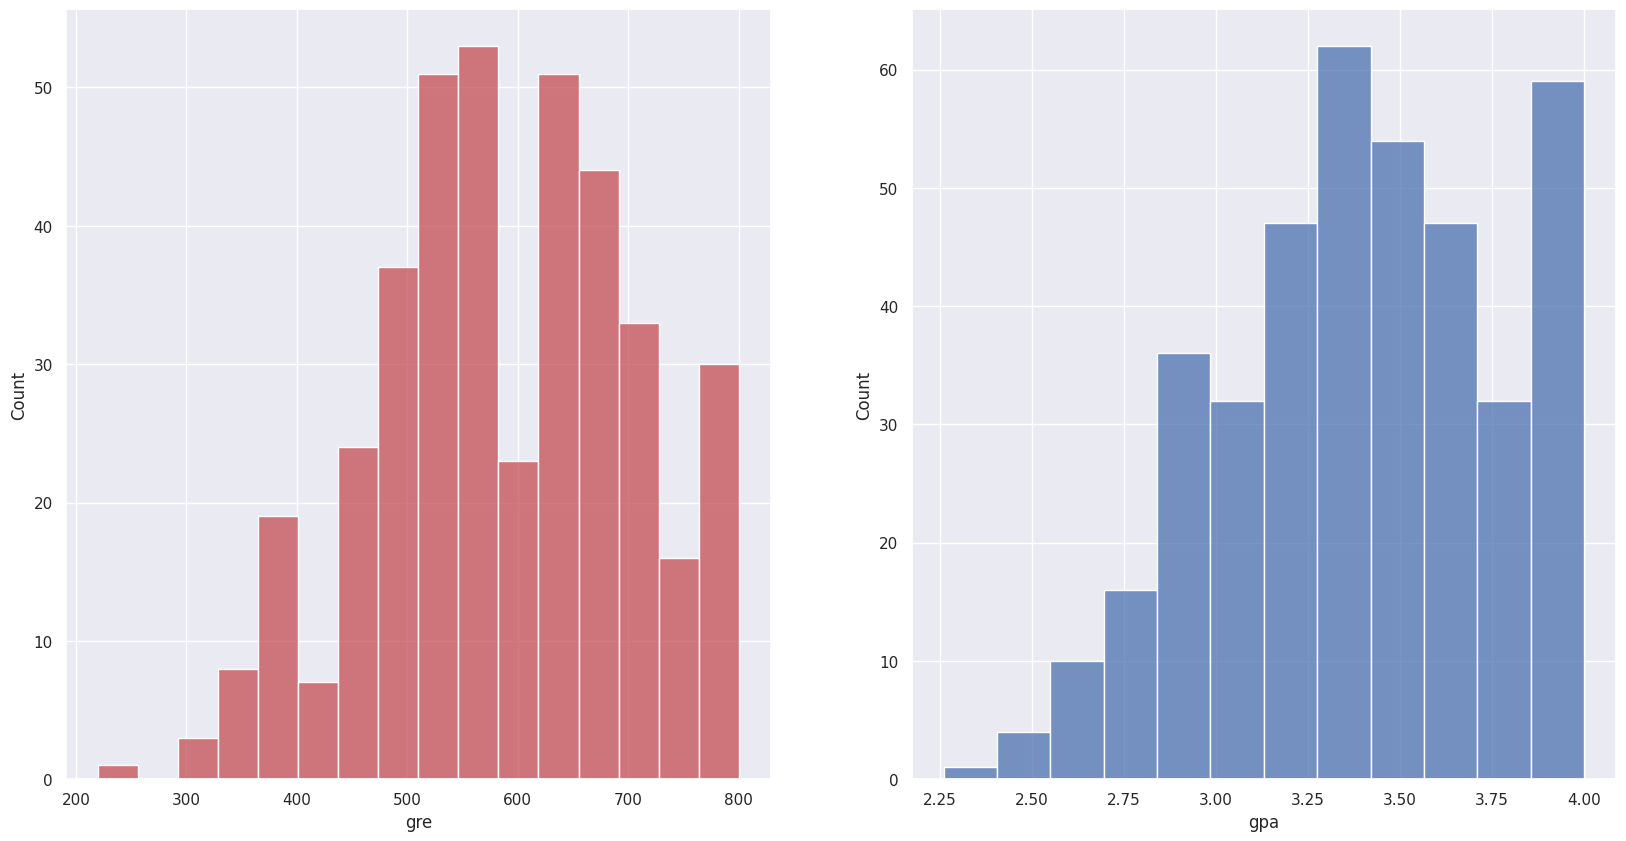

In [7]:
#Third step is to visualize these data in graphical form
#I have used Seaborn library for data visualization

sns.set(color_codes=True)

#Set multiple axis
f, axes = plt.subplots(1, 2, figsize=(20, 10))

#GRE data
sns.histplot(df.iloc[:,1],color="r",ax = axes[0]) #All Row data and first column
#GPA data
sns.histplot(df.iloc[:,2],color="b",ax = axes[1]) #All Row data and second column

#We can see that the data forms good bell shaped curve.(Distributed in Gaussian values.)

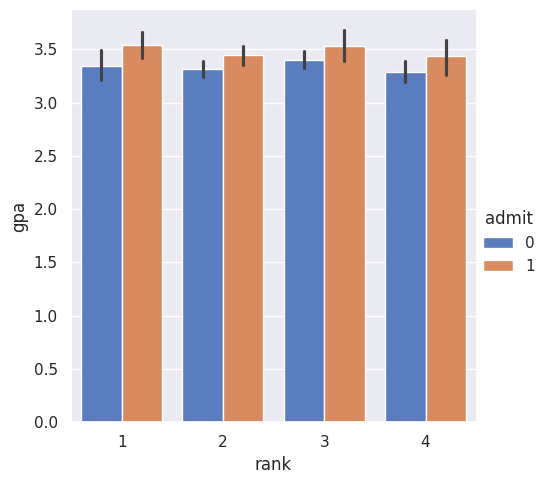

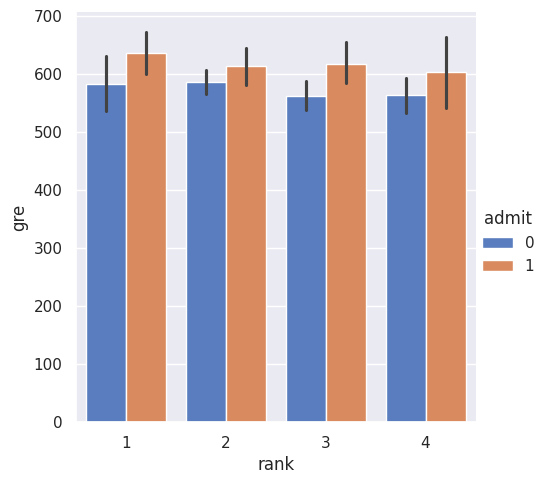

In [10]:

sns.catplot(x="rank", y="gpa", hue="admit", data=df,
                   size=6, kind="bar", palette="muted")
sns.catplot(x="rank", y="gre", hue="admit", data=df,
                   size=6, kind="bar", palette="muted")


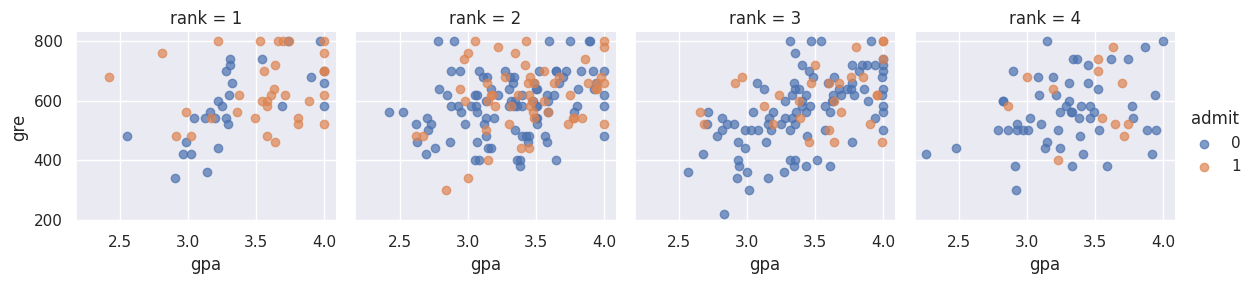

In [12]:
#Draw graphs for gre --> gpa for rank1,2,3,4

g = sns.FacetGrid(df,col='rank',hue="admit",size=6)
g.map(plt.scatter, "gpa", "gre", alpha=.7)
g.add_legend();

#From below graphs, we can see that for each rank, data are scattered randomly and we can not draw a line to seperate admit/rejected

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


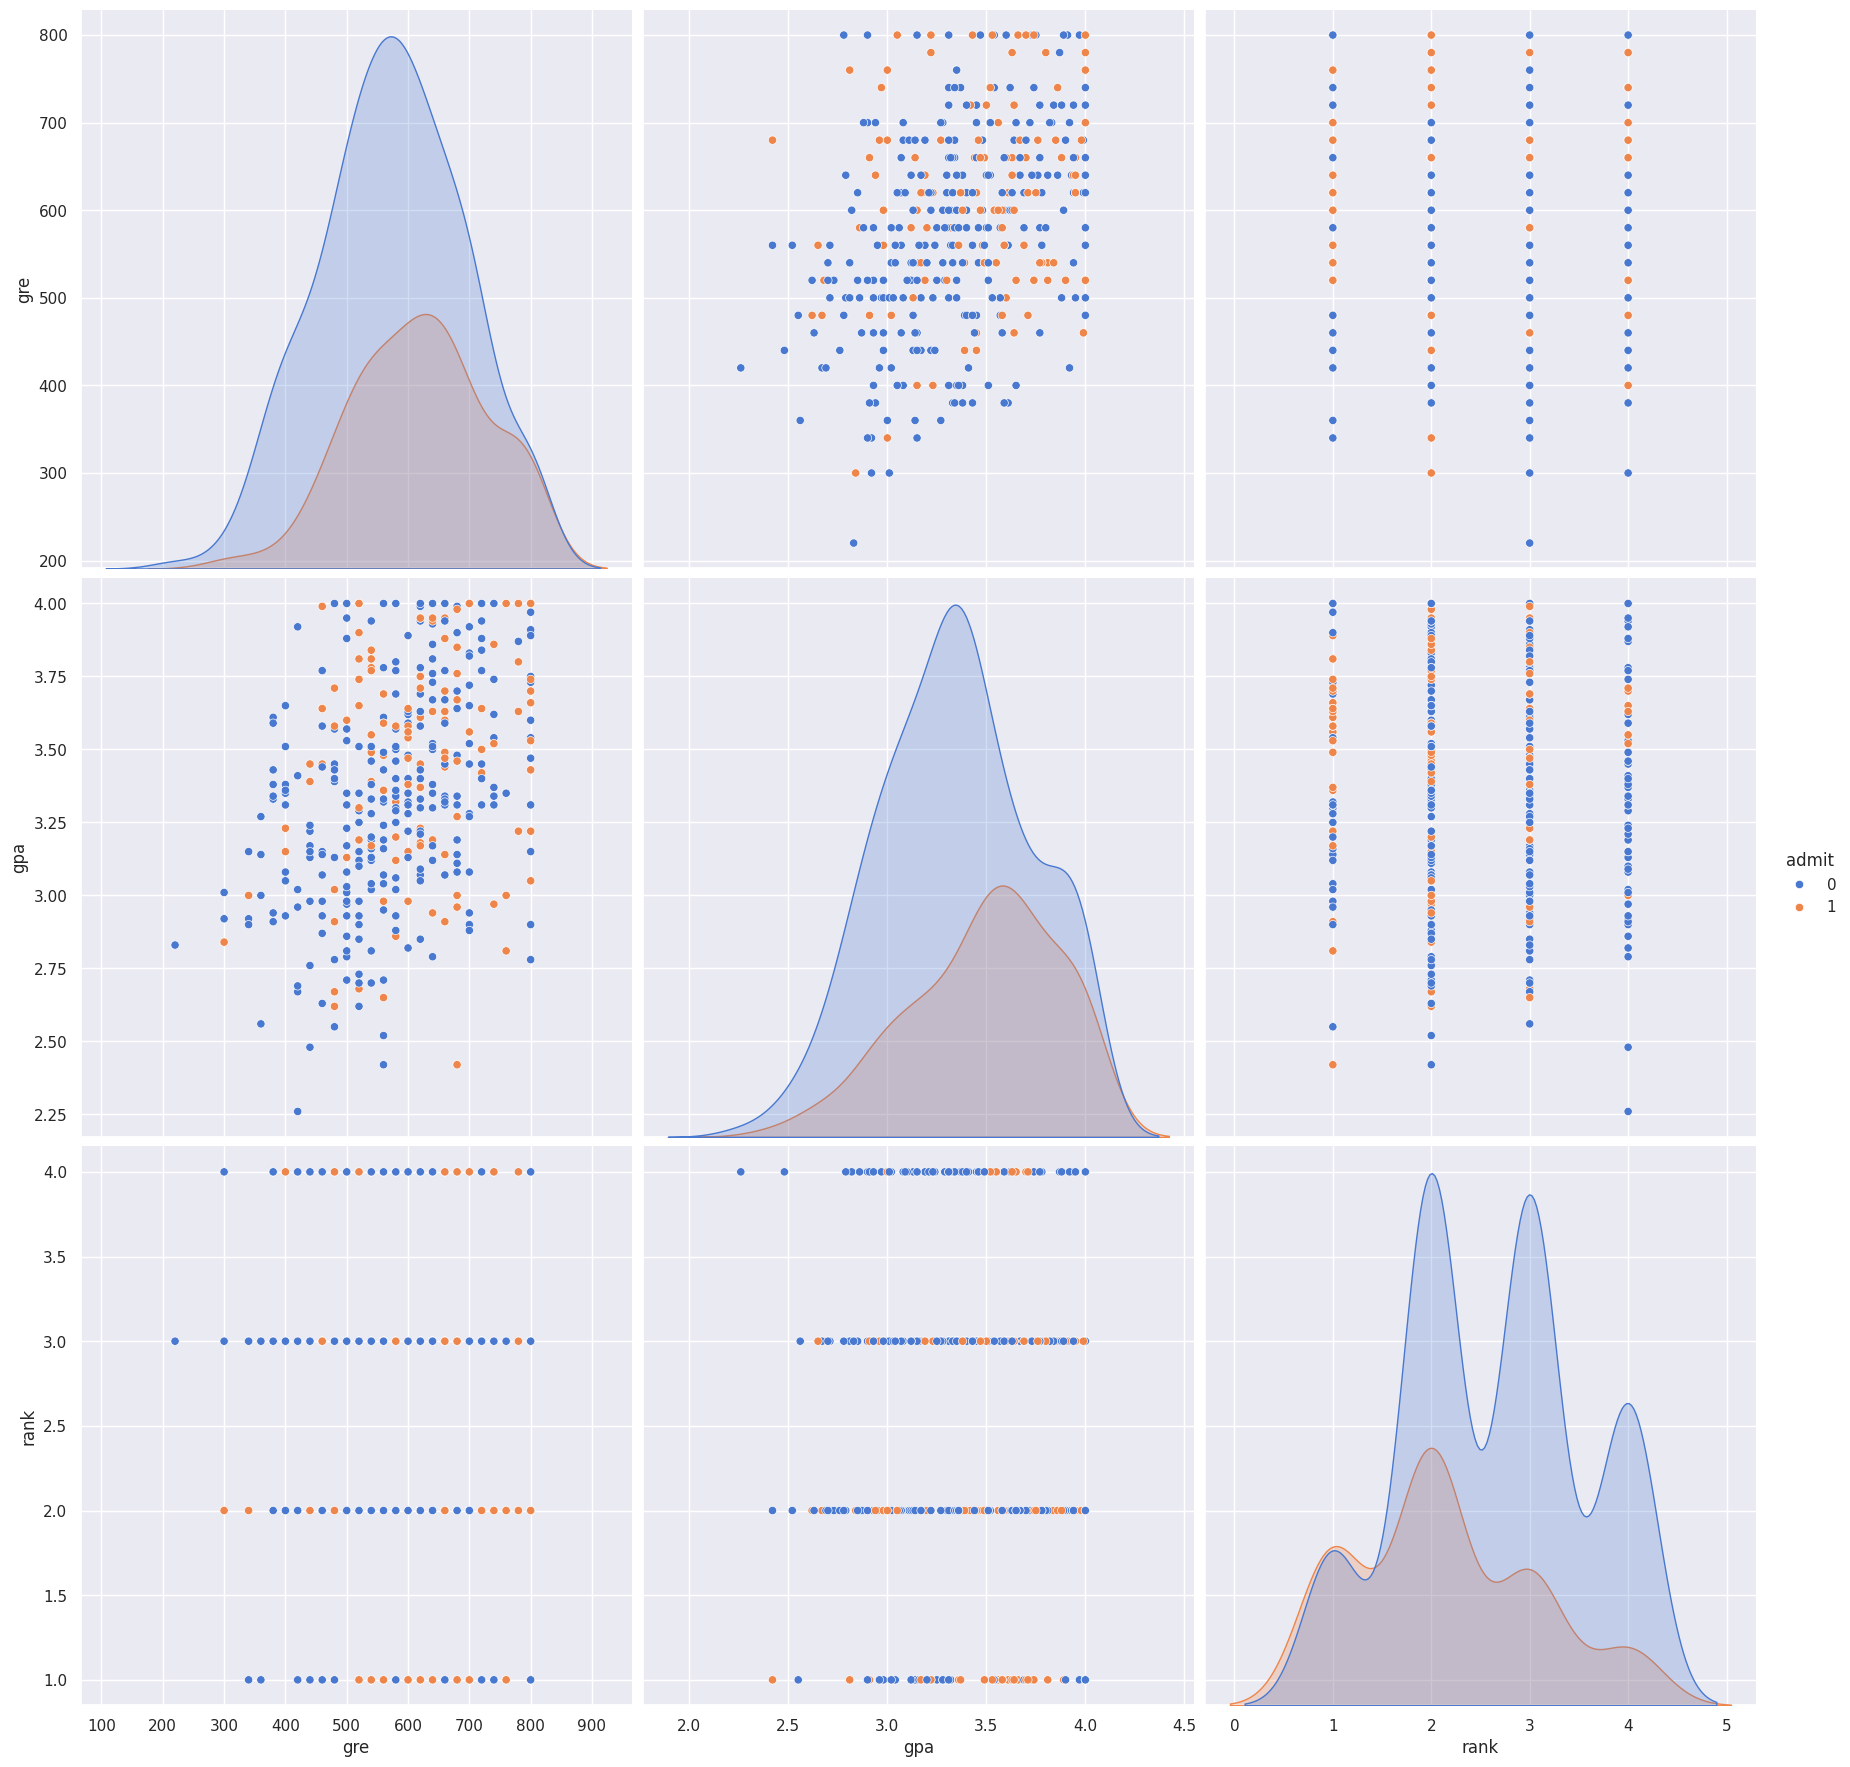

In [13]:
sns.pairplot(df, hue="admit",palette="muted",x_vars=['gre','gpa','rank'],y_vars=['gre','gpa','rank'],size=6)
#From following graphs we can the data are scattered randomly and we can not draw a simple boundary line for accepted/rejected

In [14]:
#Forth part is to train our own model using sigmoid function and find accuracy of it.
#First of all, we have to convert 'rank' column into four seperate columns according to its value.
#I have used get_dummies method for it.

df_with_dummies = pd.get_dummies( df['rank'] )

#This will create four columns and fill values according to original column value. SO if in original 'rank' column,
#if the value is 3 for some example then in new columns, column 3 will have value 1 and all other (1,2,4) will have
#value 0
df_with_dummies.head()

,1,2,3,4
0,False,False,True,False
1,False,False,True,False
2,True,False,False,False
3,False,False,False,True
4,False,False,False,True


In [15]:
df_new = pd.concat([df, df_with_dummies], axis=1)
df_new = df_new.drop('rank',axis=1)
df_new.head()

,admit,gre,gpa,1,2,3,4
0,0,380,3.61,False,False,True,False
1,1,660,3.67,False,False,True,False
2,1,800,4.00,True,False,False,False
3,1,640,3.19,False,False,False,True
4,0,520,2.93,False,False,False,True


In [16]:
#Now we need to normalize GRE and GPA columns value as they have large values.
#I am using Sigmoid function. This function gives zero slope for very large and small values.
#So gradient descent will be zero if we use large values.
#So, I have normalize both columns with mean value as 0 and standard deviation as 1

gre_mean,gre_std = df_new['gre'].mean(),df_new['gre'].std()
gpa_mean,gpa_std = df_new['gpa'].mean(),df_new['gpa'].std()

df_new.loc[:,'gre'] = (df_new['gre'] - gre_mean) / gre_std
df_new.loc[:,'gpa'] = (df_new['gpa'] - gpa_mean) / gpa_std

df_new.head()

/tmp/ipython-input-16-2059524886.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.79801097  0.62588442  1.83783211  0.45274903 -0.58606328  1.49156134
 -0.23979251 -1.62487559 -0.41292789  0.97215519  1.83783211 -1.27860482
  1.49156134  0.97215519  0.97215519 -0.93233405  1.66469673 -1.97114636
  1.83783211 -0.41292789 -0.75919866  0.62588442  0.10647826  0.7990198
  1.49156134  1.83783211  0.27961365 -0.58606328  1.66469673 -0.58606328
 -0.41292789  1.49156134  0.10647826  1.83783211 -1.97114636 -1.62487559
 -0.06665712 -0.58606328 -0.75919866 -0.58606328 -0.23979251 -0.06665712
  0.10647826 -0.75919866  0.97215519 -1.10546943 -0.06665712 -0.75919866
 -1.27860482 -1.62487559  0.45274903 -1.27860482  1.31842596  0.7990198
  0.62588442  1.31842596 -0.23979251 -1.79801097 -1.62487559  0.10647826
  0.27961365 -0.23979251  0.45274903  0.7990198  -0.06665712  0.10647826
  1.31842596  0.27961365 -0.06665712  1.83

,admit,gre,gpa,1,2,3,4
0,0,-1.798011,0.578348,False,False,True,False
1,1,0.625884,0.736008,False,False,True,False
2,1,1.837832,1.603135,True,False,False,False
3,1,0.452749,-0.525269,False,False,False,True
4,0,-0.586063,-1.208461,False,False,False,True


In [17]:
msk = np.random.rand(len(df_new)) < 0.9

train = df_new[msk]

test = df_new[~msk]
print (len(train))
print (len(test))

print (train.head())

354
46
   admit       gre       gpa      1      2      3      4
1      1  0.625884  0.736008  False  False   True  False
2      1  1.837832  1.603135   True  False  False  False
3      1  0.452749 -0.525269  False  False  False   True
4      0 -0.586063 -1.208461  False  False  False   True
5      1  1.491561 -1.024525  False   True  False  False


In [18]:
# Split into features and targets
features, targets = train.drop('admit', axis=1), train['admit']
features_test, targets_test = test.drop('admit', axis=1), test['admit']

In [19]:
#Sigmoid function definition
def sigmoid(x):

    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):

    return sigmoid(x) * (1 - sigmoid(x))




In [25]:
#Sixt parth is about understanding of Machine learning models from sklearn module.
#Above we have already created train and test data.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Model Preparation
num_trees = 200
max_features = 3
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

print (models)

[('LR', LogisticRegression()), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('DTC', DecisionTreeClassifier()), ('RF', RandomForestClassifier(max_features=3, n_estimators=200)), ('NB', GaussianNB()), ('SVM', SVC())]


In [26]:
msk1 = np.random.rand(len(df)) < 0.9

train_on_original = df[msk1]

test_on_original = df[~msk1]
print (len(train_on_original))
print (len(test_on_original))

print (train_on_original.head())

# Split into features and targets
features_train_original, targets_train_original = train_on_original.drop('admit', axis=1), train_on_original['admit']
features_test_original, targets_test_original = test_on_original.drop('admit', axis=1), test_on_original['admit']

364
36
   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


[Text(0.0, 0, ''),
 Text(0.2, 0, ''),
 Text(0.4, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

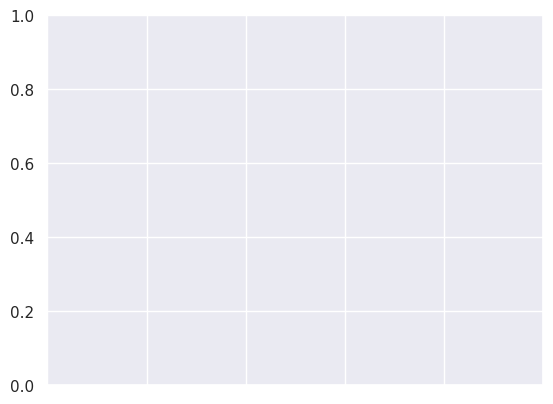

In [28]:
#Here LDA is achieving ~71% of training accuracy
#sns.boxplot(results)
ax = sns.boxplot(data=results, palette="Set3")
ax.set_xticklabels(names)

In [29]:
#Now the prediction of a new data on any model. I have worked with LDA.

model = LinearDiscriminantAnalysis()
model.fit(features_train_original,targets_train_original)

predictions = model.predict(features_test_original)
print (predictions)
print ("LDA Model")
print (accuracy_score(targets_test_original, predictions)*100)

print(classification_report(targets_test_original, predictions))


LinearDiscriminantAnalysis()

[1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1]
LDA Model
77.77777777777779
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.44      0.57      0.50         7

    accuracy                           0.78        36
   macro avg       0.67      0.70      0.68        36
weighted avg       0.80      0.78      0.79        36



In [ ]:
#LDA is trained on the training data also we have made predictions on test data.
#So the overall accuracy is 73.33% with LDA.

<Axes: >

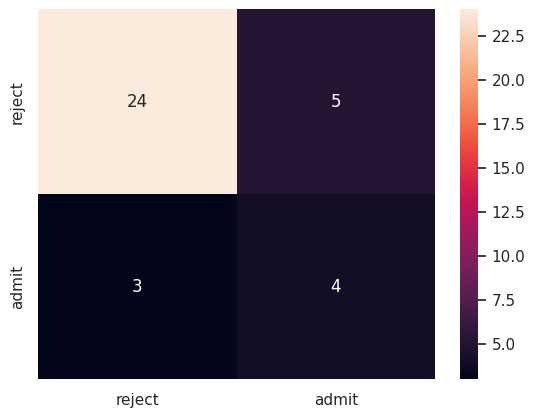

In [30]:
cm = confusion_matrix(targets_test_original,predictions)
sns.heatmap(cm,annot=True,xticklabels=['reject', 'admit'],yticklabels=['reject', 'admit'])

In [31]:
#Prediction on new data

#data_x = [gre,gpa,rank]
#model.predict method expects 2D array. First I tried to define data_1 as [750,4,1] which was 1D array so
#it was throwing an error. So I converted data_1 from (3,) to (1,3).
labels = ["Rejected","Accepted"]
data_1 = np.array([750,4,1],ndmin=2)
data_2 = np.array([700,2,2],ndmin=2)
data_3 = np.array([200,2,4],ndmin=2)

prediction_1 = model.predict(data_1)
prediction_2 = model.predict(data_2)
prediction_3 = model.predict(data_3)

print ("Status for data_1 is: ", labels[int(prediction_1)])
print ("Status for data_2 is: ", labels[int(prediction_2)])
print ("Status for data_3 is: ", labels[int(prediction_3)])


Status for data_1 is:  Accepted
Status for data_2 is:  Rejected
Status for data_3 is:  Rejected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/tmp/ipython-input-31-3021956906.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("Status for data_1 is: ", labels[int(prediction_1)])
/tmp/ipython-input-31-3021956906.py:16: DeprecationWarning: Conversion 

In [ ]:
#As we can see for data_1 both gre and gpa and rank is higher so it is accepted
#For data_2 gpa is low thats why it is rejected
#For data_3 gpa,gre and rank is low so it is rejected.